In [1]:
from lgbm_model import LGBMClassifierModel

In [2]:
lgbm_model = LGBMClassifierModel()
data = lgbm_model.load_data('binance', 'BTC/USDT', '15m', '2023-01-01', '2024-06-22')
data = lgbm_model.get_features(data)
data= lgbm_model.get_target(data, period=3)
X_train, X_test, y_train, y_test = lgbm_model.split_data(data)
model = lgbm_model.train(X_train, y_train, X_test, y_test)
lgbm_model.evaluate(model, X_train, y_train)
lgbm_model.evaluate(model, X_test, y_test)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[8]	valid_0's binary_logloss: 0.690086
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fr

{'accuracy': 0.5358424677466291,
 'precision': 0.5314294830887045,
 'recall': 0.6431743579841668,
 'f1': 0.5819865466934568,
 'roc_auc': 0.535329869050563,
 'confusion_matrix': array([[2193, 2937],
        [1848, 3331]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.54      0.43      0.48      5130\n           1       0.53      0.64      0.58      5179\n\n    accuracy                           0.54     10309\n   macro avg       0.54      0.54      0.53     10309\nweighted avg       0.54      0.54      0.53     10309\n'}

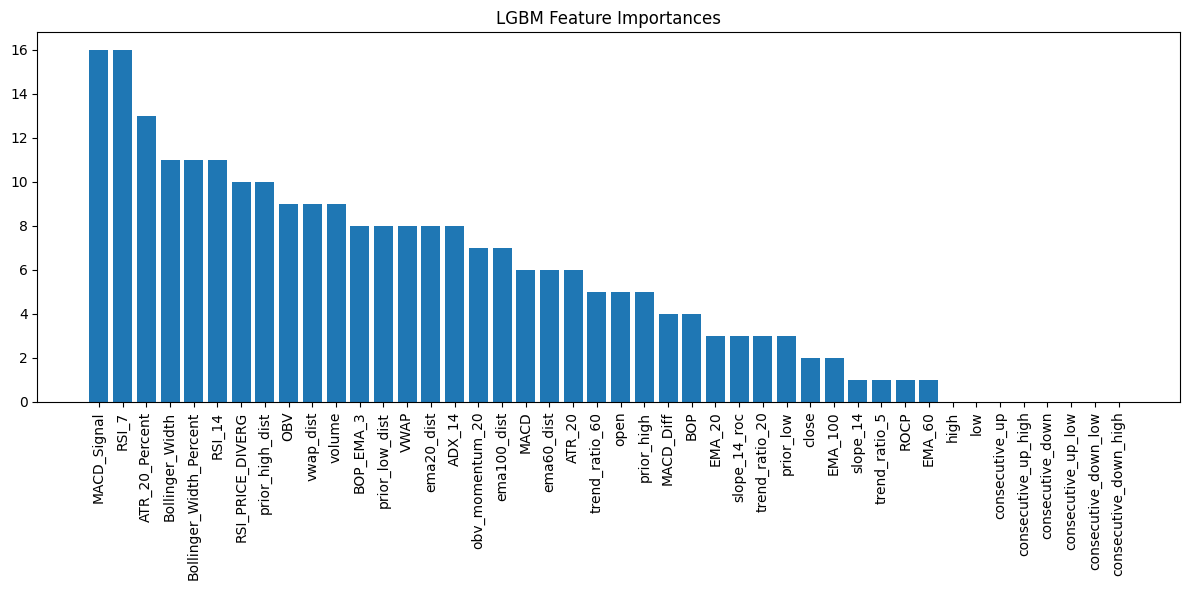

In [3]:
import numpy as np

import matplotlib.pyplot as plt

# 获取特征名（假设X_train和data的特征顺序一致）
feature_names = data.drop(columns=['Target']).columns

# 获取特征重要性
importances = model.feature_importances_

# 按重要性排序
indices = np.argsort(importances)[::-1]

# 可视化
plt.figure(figsize=(12, 6))
plt.title("LGBM Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [6]:
# 获取前15个重要特征的索引
top_15_indices = indices[:5]

# 获取前15个特征名
top_15_features = feature_names[top_15_indices]

# 重新构建训练集和测试集，仅包含前15个特征
X_train_top15 = X_train[:, top_15_indices]
X_test_top15 = X_test[:, top_15_indices]

# 重新训练模型
model_top15 = lgbm_model.train(X_train_top15, y_train, X_test_top15, y_test)

# 评估新模型
lgbm_model.evaluate(model_top15, X_train_top15, y_train)
lgbm_model.evaluate(model_top15, X_test_top15, y_test)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.690214
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fr

{'accuracy': 0.5363274808419828,
 'precision': 0.5308393878497449,
 'recall': 0.6630623672523653,
 'f1': 0.5896291208791209,
 'roc_auc': 0.5357222167645842,
 'confusion_matrix': array([[2095, 3035],
        [1745, 3434]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.55      0.41      0.47      5130\n           1       0.53      0.66      0.59      5179\n\n    accuracy                           0.54     10309\n   macro avg       0.54      0.54      0.53     10309\nweighted avg       0.54      0.54      0.53     10309\n'}